In [0]:
import matplotlib.pyplot as plt 
  
# Import scikit-learn library 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
  
import numpy as np 

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4) 
  
# introspect the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 
  
# Instead of providing 2D data, X has data already in the form  of a vector that 
# is required in this approach. 
X = lfw_people.data 
n_features = X.shape[1] 
  
# the label to predict is the id of the person 
y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 
  
# Print Details about dataset 
print("Number of Data Samples: % d" % n_samples) 
print("Size of a data sample: % d" % n_features) 
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7


In [8]:
X[0].shape

(1850,)

In [9]:
n_classes

7

In [10]:
y

array([5, 6, 3, ..., 5, 3, 5])

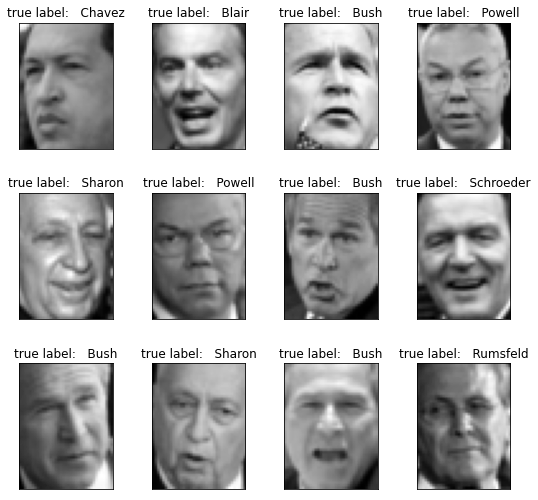

In [11]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1) 
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
        plt.title(titles[i], size = 12) 
        plt.xticks(()) 
        plt.yticks(()) 
  
# Generate true labels above the images 
def true_title(Y, target_names, i): 
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
    return 'true label:   % s' % (true_name) 
  
true_titles = [true_title(y, target_names, i) 
                     for i in range(y.shape[0])] 
plot_gallery(X, true_titles, h, w) 

In [12]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25, random_state = 42) 
print("size of training Data is % d and Testing Data is % d" %( 
        y_train.shape[0], y_test.shape[0])) 

size of training Data is  966 and Testing Data is  322


In [0]:
from time import time

In [18]:
n_components = 150
  
t0 = time() 
pca = PCA(n_components = n_components, svd_solver ='randomized', 
          whiten = True).fit(X_train) 
print("done in % 0.3fs" % (time() - t0)) 
  
eigenfaces = pca.components_.reshape((n_components, h, w)) 
  
print("Projecting the input data on the eigenfaces orthonormal basis") 
t0 = time() 
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test) 
print("done in % 0.3fs" % (time() - t0)) 

done in  0.250s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.024s


In [19]:
print("Sample Data point after applying PCA\n", X_train_pca[0]) 
print("-----------------------------------------------------") 
print("Dimesnsions of training set = % s and Test Set = % s"%( 
        X_train.shape, X_test.shape)) 

Sample Data point after applying PCA
 [-2.075603   -1.0457909   2.1269355   0.03682322 -0.75757015 -0.5173652
  0.8555054   1.0519382   0.45774058  0.01346943 -0.03962779  0.63872737
  0.48167467  2.3378298   1.7784895   0.13308778 -2.2712586  -4.45699
  2.097646   -1.1379273   0.18844026 -0.33498013  1.1254424  -0.32402197
  0.14094336  1.0769603   0.7588215  -0.09977967  3.1199539   0.88379335
 -0.89338064  1.159576    1.4306953   1.6856282   1.3434856  -1.2590727
 -0.6391265  -2.3363023  -0.01365568 -1.4638124  -0.46895307 -1.0547547
 -1.3328156   1.1365122   2.2223892  -1.8014139  -0.30631912 -1.0284001
  4.7738643   3.4595659   1.9259751  -1.3513833  -0.25864038  2.0104167
 -1.0567737   0.3610276   1.1709347   0.75756454  0.90044314  0.59923756
 -0.46478707  2.09752     1.345196    1.9319265   5.066369   -0.70623535
  0.6055579  -0.8993116  -0.21470104 -2.1078515  -1.6833382  -0.19583537
 -1.747382   -3.0558121   2.053291    0.39306     0.12907454  1.2061564
 -0.7962363  -1.390446

In [20]:
print("Fitting the classifier to the training set") 
t0 = time() 
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } 
clf = GridSearchCV( 
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid 
) 
clf = clf.fit(X_train_pca, y_train) 
print("done in % 0.3fs" % (time() - t0)) 
print("Best estimator found by grid search:") 
print(clf.best_estimator_) 
  
print("Predicting people's names on the test set") 
t0 = time() 
y_pred = clf.predict(X_test_pca) 
print("done in % 0.3fs" % (time() - t0)) 
# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 
# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) 

Fitting the classifier to the training set
done in  45.758s
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Predicting people's names on the test set
done in  0.076s
                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.46      0.60        13
     Colin Powell       0.80      0.87      0.83        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.82      0.98      0.89       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.85       322
        macro avg       0.91      0.72      0.79       

In [0]:
#Accuracy is 85% for LFW dataset.....